In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import h5py

Choose a file to load:

In [2]:
file='/Users/migraf/Desktop/MinIon/Chimera_2nd_PC_20161110_FNid1_MN19784_sequencing_run_QCProtocol_59843_ch45_read1391_strand.fast5'

Inspect the data structure of the file

In [3]:
!h5dump -H $file

HDF5 "/Users/migraf/Desktop/MinIon/Chimera_2nd_PC_20161110_FNid1_MN19784_sequencing_run_QCProtocol_59843_ch45_read1391_strand.fast5" {
GROUP "/" {
   ATTRIBUTE "file_version" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SCALAR
   }
   GROUP "Analyses" {
      GROUP "Basecall_1D_000" {
         ATTRIBUTE "name" {
            DATATYPE  H5T_STRING {
               STRSIZE H5T_VARIABLE;
               STRPAD H5T_STR_NULLTERM;
               CSET H5T_CSET_ASCII;
               CTYPE H5T_C_S1;
            }
            DATASPACE  SCALAR
         }
         ATTRIBUTE "version" {
            DATATYPE  H5T_STRING {
               STRSIZE H5T_VARIABLE;
               STRPAD H5T_STR_NULLTERM;
               CSET H5T_CSET_ASCII;
               CTYPE H5T_C_S1;
            }
            DATASPACE  SCALAR
         }
         GROUP "BaseCalled_template" {
            DATASET "Fastq" {
               DATATYPE  H5T_STRING {
                  STRSIZE 115586;
                  STRPAD H5T_STR_NULLTERM

Load the file using the HDF5 framework:

In [4]:
f = h5py.File(file, "r")

First, we extract some general info:

In [5]:
Context=f[('UniqueGlobalKey/context_tags/')]
for i in Context.attrs:
    print('{}:\t{}'.format(i, Context.attrs[i]))

filename:	b'chimera_2nd_pc_20161110_fnid1_mn19784_sequencing_run_qcprotocol_59843'
experiment_kit:	b'lambda_burn_in'
experiment_type:	b'customer_qc'
user_filename_input:	b'qcprotocol'
sample_frequency:	b'4000'


Then we extract some info about the channel used:

In [6]:
Channel=f[('UniqueGlobalKey/channel_id/')]
for i in Channel.attrs:
    print('{}:\t{}'.format(i, Channel.attrs[i]))

channel_number:	b'45'
offset:	40.0
digitisation:	8192.0
range:	1513.95
sampling_rate:	4000.0


Let's save the sampling rate for later

In [7]:
samplerate=Channel.attrs['sampling_rate']
print(str(samplerate) + ' Hz')

4000.0 Hz


Now, we will try to extract the raw data.

In [8]:
subtitle=[key for key in f['Raw/Reads/'].keys()]
print(subtitle[0])

Read_1391


In [9]:
Reads=f[('Raw/Reads/' + subtitle[0])]
signal=Reads['Signal']

In [10]:
for i in Reads.attrs:
    print('{}:\t{}'.format(i, Reads.attrs[i]))

read_number:	1391
read_id:	b'd50d4409-2349-41a1-a6ef-822054469161'
start_mux:	3
start_time:	53057080
duration:	830758
median_before:	225.1837827532479


Plot the data, i guess y-axis is in pA and x is samples

<IPython.core.display.Javascript object>


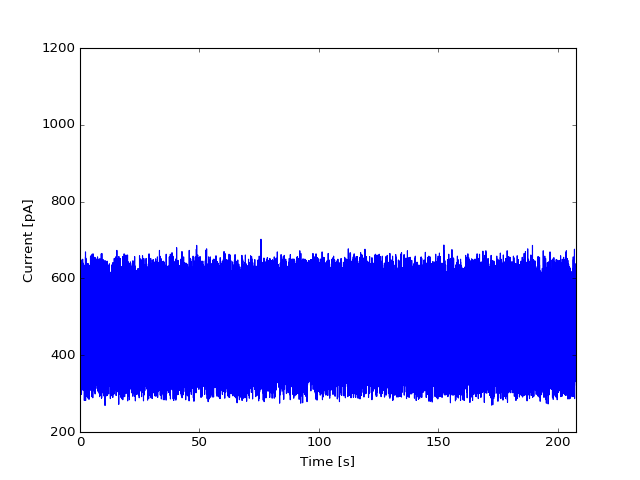

(0, 207.68924999999999)

In [11]:
t=np.arange(len(signal))
t=t/samplerate
plt.figure(1)
plt.plot(t,signal)
plt.xlabel('Time [s]')
plt.ylabel('Current [pA]')
plt.xlim([0, np.max(t)])

Let's try to zoom into a 200ms piece

<IPython.core.display.Javascript object>


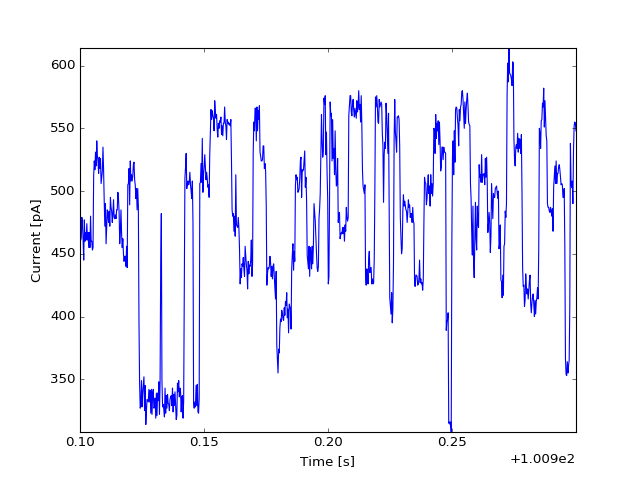

(308, 614)

In [12]:
limits=np.array([101, 101.2])
limits_samples=np.int64(limits*samplerate)
tl=t[limits_samples[0]:limits_samples[1]]
signall=signal[limits_samples[0]:limits_samples[1]]
plt.figure(2)
plt.plot(tl, signall)
plt.xlabel('Time [s]')
plt.ylabel('Current [pA]')
plt.xlim((np.min(tl), np.max(tl)))
plt.ylim((np.min(signall), np.max(signall)))